https://stackoverflow.com/questions/70452465/how-to-load-in-graph-from-networkx-into-pytorch-geometric-and-set-node-features<br>
El objetivo es pasar de un grafo de networkx a uno de pytorch. Utilizando la librería PyG (Pytorch Geometric)

In [1]:
import networkx as nx
import numpy as np
import torch
from torch_geometric.utils.convert import from_networkx
import matplotlib.pyplot as plt
import random


# Make the networkx graph
G = nx.Graph()

# Add some cars (just do 4 for now)
G.add_nodes_from([
      (1, {'y': 1, 'x': 0.5}),
      (2, {'y': 2, 'x': 0.2}),
      (3, {'y': 1, 'x': 0.3}),
      (4, {'y': 1, 'x': 0.1}),
      (5, {'y': 2, 'x': 0.2}),
])

# Add some edges
G.add_edges_from([
                  (1, 2), (1, 4), (1, 5),
                  (2, 3), (2, 4),
                  (3, 2), (3, 5),
                  (4, 1), (4, 2),
                  (5, 1), (5, 3)
])


# Inspeccionando con Networkx

In [2]:
G.nodes()

NodeView((1, 2, 3, 4, 5))

In [3]:
G.nodes(data=True)

NodeDataView({1: {'y': 1, 'x': 0.5}, 2: {'y': 2, 'x': 0.2}, 3: {'y': 1, 'x': 0.3}, 4: {'y': 1, 'x': 0.1}, 5: {'y': 2, 'x': 0.2}})

In [4]:
# node_dict = dict(G.nodes(data=True))
node_dict

NameError: name 'node_dict' is not defined

In [5]:
G.edges()

EdgeView([(1, 2), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5)])

In [6]:
G.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 4, {}), (1, 5, {}), (2, 3, {}), (2, 4, {}), (3, 5, {})])

In [7]:
# Add some cars (just do 4 for now)
G.add_nodes_from([
      (1, {'Brand': 'Ford'}),
      (2, {'Brand': 'Audi'}),
      (3, {'Brand': 'BMW'}),
      (4, {'Brand': 'Peugeot'}),
      (5, {'Brand': 'Lexus'}),
])
node_descript = dict(G.nodes(data=True))
node_descript   

{1: {'y': 1, 'x': 0.5, 'Brand': 'Ford'},
 2: {'y': 2, 'x': 0.2, 'Brand': 'Audi'},
 3: {'y': 1, 'x': 0.3, 'Brand': 'BMW'},
 4: {'y': 1, 'x': 0.1, 'Brand': 'Peugeot'},
 5: {'y': 2, 'x': 0.2, 'Brand': 'Lexus'}}

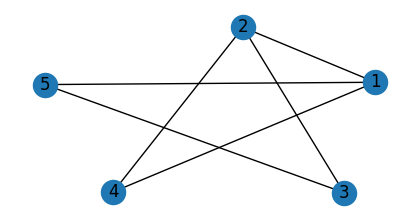

In [8]:
plt.figure(figsize=(4,2))
nx.draw(G, with_labels=True)

In [9]:
aristas = G.edges()
new_dict ={}
for tuple in aristas:
    valor = random.randint(1,9)*10 + random.randint(1,9)
    new_dict[tuple] ={"randon" : valor}
nx.set_edge_attributes(G, new_dict)
for dato in G.edges(data=True):
    print(dato)


(1, 2, {'randon': 28})
(1, 4, {'randon': 48})
(1, 5, {'randon': 45})
(2, 3, {'randon': 94})
(2, 4, {'randon': 73})
(3, 5, {'randon': 74})


¿ Y si queremos añadir atributos a las edges 'aristas'?

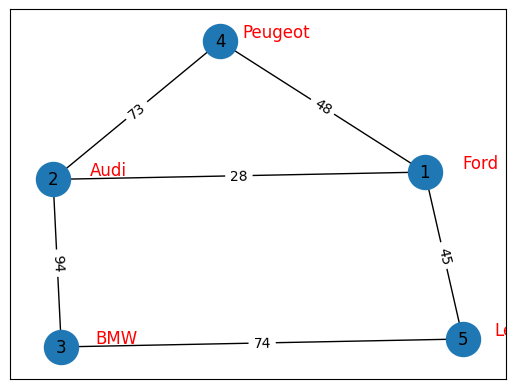

In [10]:
pos = nx.spring_layout(G, seed=0)

# get edge and node attributes
edge_labels = nx.get_edge_attributes(G, 'randon')
node_states = nx.get_node_attributes(G, 'Brand')
# set node state positions
state_pos = {n: (x+0.12, y+0.05) for n, (x,y) in pos.items()}

# draw graph
nx.draw_networkx(G, pos, node_size=600)
# draw node state labels
nx.draw_networkx_labels(G, state_pos, labels=node_states, font_color='red')
# draw edge attributes
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels);

# From networkx to PyTorch Geometric

In [11]:
# Convert the graph into PyTorch geometric
pyg_graph = from_networkx(G)

In [12]:
print(pyg_graph)

Data(x=[5], edge_index=[2, 12], y=[5], Brand=[5], randon=[12])


In [13]:
print(pyg_graph.x)

tensor([0.5000, 0.2000, 0.3000, 0.1000, 0.2000])


In [14]:
print(pyg_graph.y)

tensor([1, 2, 1, 1, 2])


In [15]:
print(pyg_graph.num_node_features)

1


In [16]:
# # Add some cars (just do 4 for now)
# G.add_nodes_from([
#       (1, {'y': 1, 'x': 0.5}),
#       (2, {'y': 2, 'x': 0.2}),
#       (3, {'y': 3, 'x': 0.3}),
#       (4, {'y': 4, 'x': 0.1}),
#       (5, {'y': 5, 'x': 0.2}),

# Add some edges
# G.add_edges_from([
#                   (1, 2), (1, 4), (1, 5),
#                   (2, 3), (2, 4),
#                   (3, 2), (3, 5),
#                   (4, 1), (4, 2),
#                   (5, 1), (5, 3)

print(pyg_graph.edge_index)

tensor([[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
        [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]])


In [17]:
print(pyg_graph.edge_attrs())

['edge_index', 'randon']


In [18]:
print(pyg_graph.Brand)

['Ford', 'Audi', 'BMW', 'Peugeot', 'Lexus']


In [19]:
print(pyg_graph.randon)

tensor([28, 48, 45, 28, 94, 73, 94, 74, 48, 73, 45, 74])


# torch_geometric.data/Data
class Data(x: Optional[Tensor] = None, edge_index: Optional[Tensor] = None, edge_attr: Optional[Tensor] = None, y: Optional[Tensor] = None, pos: Optional[Tensor] = None, **kwargs)<br>

Graph neural networks typically expect (a subset of):
- node features
- edges
- edge attributes
- node targets


In [20]:
print(pyg_graph)

Data(x=[5], edge_index=[2, 12], y=[5], Brand=[5], randon=[12])


Hemos conseguido meter en los nodos y en las aristas información adicional<br>
Ahora hay que pensar que tipo de ejercicio queremos hacer con grafos.

In [21]:
for i in pyg_graph:
    print(i)

('x', tensor([0.5000, 0.2000, 0.3000, 0.1000, 0.2000]))
('edge_index', tensor([[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4],
        [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]]))
('y', tensor([1, 2, 1, 1, 2]))
('Brand', ['Ford', 'Audi', 'BMW', 'Peugeot', 'Lexus'])
('randon', tensor([28, 48, 45, 28, 94, 73, 94, 74, 48, 73, 45, 74]))


In [25]:
x,edge_index, y,algo1, algo2= pyg_graph
print(f"x: {x}")
print(f" algo1 :{algo1}")

x: ('x', tensor([0.5000, 0.2000, 0.3000, 0.1000, 0.2000]))
 algo1 :('Brand', ['Ford', 'Audi', 'BMW', 'Peugeot', 'Lexus'])


Intentamos que la red neuronal chupe el grafo

In [26]:
karate_club = pyg_graph  # le llamo Karate club por comodidad
print(karate_club)

Data(x=[5], edge_index=[2, 12], y=[5], Brand=[5], randon=[12])


In [27]:
# Let us have a look at the connections in the graph.
edge_index = karate_club.edge_index
print(edge_index.tolist())

[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4], [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]]


In [28]:
# Voy a hacer lo mismo con el resto de los atributos

feature_mat = karate_club.x
print(feature_mat.t())

# Hay 4 'labels [0,1,2,3]
labels = karate_club.y
print(labels.t())

tensor([0.5000, 0.2000, 0.3000, 0.1000, 0.2000])
tensor([1, 2, 1, 1, 2])


Nos tenía que salir esto :
las x : en forma de matriz con digonales, es una matriz identidad de el numero de nodos

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])
tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])

In [30]:
new_feature_mat = torch.eye(len(feature_mat))
print(new_feature_mat)

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])


In [34]:
karate_club.x = new_feature_mat
print(karate_club.x)
print(karate_club.y)
print(karate_club.edge_index.tolist())

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])
tensor([1, 2, 1, 1, 2])
[[0, 0, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4], [1, 3, 4, 0, 2, 3, 1, 4, 0, 1, 0, 2]]


Me falta generar las mascaras, lo hago a pinrel

In [41]:
a = torch.ones(5, dtype=torch.bool)
a[3:5] = False
a
karate_club.train_mask = a
print(karate_club.train_mask)

tensor([ True,  True,  True, False, False])


In [63]:
from torch_geometric.data import Data
data = Data(x=karate_club.x, edge_index=karate_club.edge_index, y=karate_club.y, train_mask=karate_club.train_mask)
data

Data(x=[5, 5], edge_index=[2, 12], y=[5], train_mask=[5])

## Me limito a copiar de Notebook "1.base_pytorch"

In [64]:
# Generamos una función que 'wrapper/helper' para los parametros de visualización
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=True,
                     node_color=color, cmap="Set2")
    plt.show()

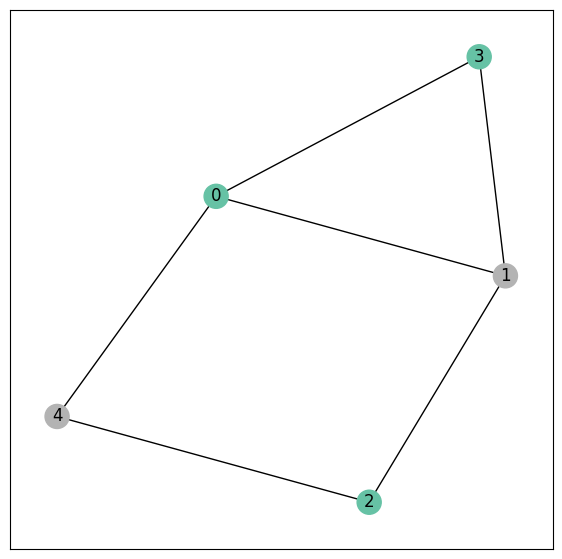

In [65]:
from torch_geometric.utils import to_networkx
# Convert the PyG graph to NetworkX graph
G = to_networkx(karate_club, to_undirected=True)
visualize_graph(G, color=karate_club.y)

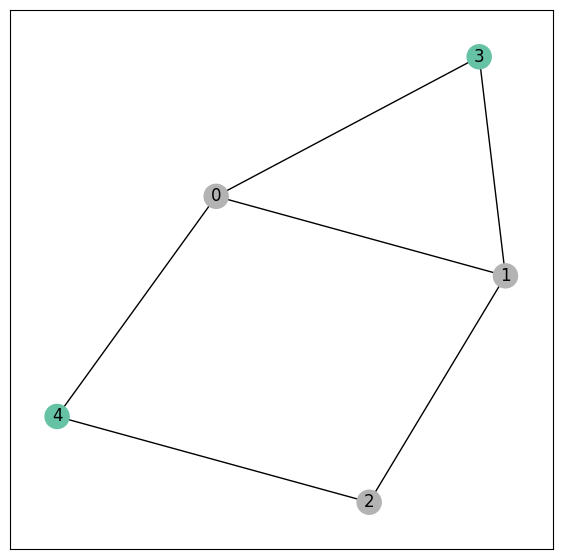

In [66]:
# Voy a intentar visualizar el grafo y que me identifique los 4 nodos especiales
visualize_graph(G, color=karate_club.train_mask)

# Creating the PyTorch Model

In [67]:
import torch
from torch.nn import Linear, Dropout, Tanh, ReLU # import the torch layers
torch.manual_seed(140) # for reproducibility


In [68]:
g_prueba = torch.Generator()
print(g_prueba.get_state())
# print(g_prueba.size())   => AttributeError: 'torch._C.Generator' object has no attribute 'size'
inspect = g_prueba.get_state()
print(type(inspect))
print(inspect.size)
print(len(inspect.tolist()))
print(f"El tensor 'Generator tiene {len(inspect.tolist())} elementos")

tensor([  1, 209, 156,  ...,   0,   0,   0], dtype=torch.uint8)
<class 'torch.Tensor'>
<built-in method size of Tensor object at 0x7fae00dd7240>
5056
El tensor 'Generator tiene 5056 elementos


In [83]:
def accuracy(logits, labels):
    # find the accuracy 
    pred = torch.argmax(logits, dim=1)
    acc = torch.mean((pred == labels).float())
    return acc

In [69]:
# Define your own model
class MLP(torch.nn.Module):
    def __init__(self, in_channels: int, hidden_channels: int, out_channels: int):
        super(MLP, self).__init__()
        self.embed = Linear(in_channels, hidden_channels)
        self.classifier = Linear(hidden_channels, out_channels)
        self.activation = ReLU()
        self.dropout = Dropout(0.5)

    def forward(self, graph):
            x = graph.x            # tomamos el grafo 
            x = self.embed(x)      # fist layer lineal : transforma 'features' en otra dimension
            h = self.activation(x) # non linear function (para aprender mejor)
            h = self.dropout(h)    # para reducir overfitting ( va apagando neuronas al azar)
            x = self.classifier(h) # otra lineal para hacer la clasificación
            return x, h

In [87]:
print(data)
print(data.num_features)
print(type(data))


Data(x=[5, 5], edge_index=[2, 12], y=[5], train_mask=[5])
5
<class 'torch_geometric.data.data.Data'>


In [84]:
model = MLP(5, 16, 2) # Define our MLP model
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()
    out, h = model(data)
    loss = criterion(out, data.y)  # Compute the loss solely based on the training nodes.
    acc = accuracy(out, data.y)
    loss.backward()
    optimizer.step()
    return loss, h, acc, out # out lo he puesto yo


In [85]:
for epoch in range(110): # creo que en 110 loss era más pequeño
    loss, h, acc, out_mlp = train(data) # out_mlp lo he puesto yo

IndexError: Target 2 is out of bounds.

Embedding shape: [5, 16]


ValueError: perplexity must be less than n_samples

<Figure size 800x800 with 0 Axes>

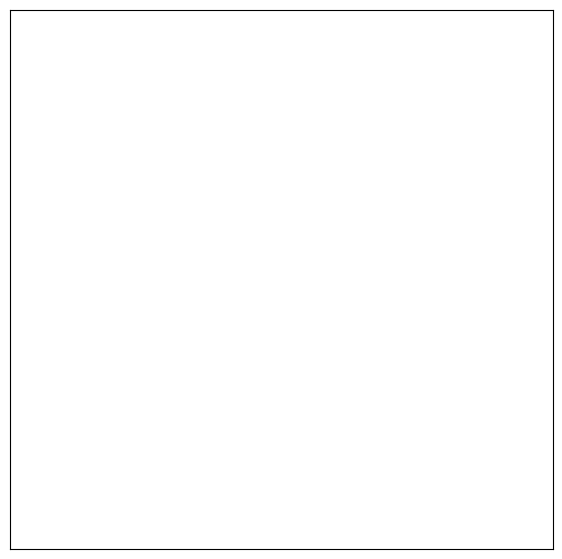

In [ ]:
## Esto para el final, para cuando tenga las cosas más claras

Por ahora funciona pero tengo que hacer dos cosas:
- Generar una matriz diagonal para definir los nodos
- Generar una máscara para 'algo del entrenamiento'

```python
# propuesta para generar dataset
# https://stackoverflow.com/questions/66788555/how-to-create-a-graph-neural-network-dataset-pytorch-geometric
data = Data(x=x, edge_index=edge_index, y=y)
data.train_idx = torch.tensor([...], dtype=torch.long)
data.test_mask = torch.tensor([...], dtype=torch.bool)
```
```python
# otra propuesta para generar dataset y loader 
# In this case, simply pass a regular python list holding Data objects and pass them to DataLoader:
# https://pytorch-geometric.readthedocs.io/en/latest/notes/create_dataset.html
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

data_list = [Data(...), ..., Data(...)]
loader = DataLoader(data_list, batch_size=32)
```